 "Develop a machine learning model that can accurately predict the sale prices of 
residential properties based on various features such as location, size, number of rooms, 
amenities, and historical sale data. The goal is to build a reliable and robust predictive model that 
can assist real estate professionals, buyers, and sellers in making informed decisions about 
property valuations. The model should be able to handle diverse datasets from multiple 
geographic regions and adapt to changing market conditions over time

# Step 1 : Reading and Understanding the Data

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("innercity.csv")

df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0000,1.7500,3050.0000,9440.0000,1,0,0.0000,3,8.0000,1800.0000,1250.0000,1966,0,98034,47.7228,-122.183,2020.0000,8660.0000,0.0000,12490
1,3145600250,20150317T000000,190000,2.0000,1.0000,670.0000,3101.0000,1,0,0.0000,4,6.0000,670.0000,0.0000,1948,0,98118,47.5546,-122.274,1660.0000,4100.0000,0.0000,3771
2,7129303070,20140820T000000,735000,4.0000,2.7500,3040.0000,2415.0000,2,1,4.0000,3,8.0000,3040.0000,0.0000,1966,0,98118,47.5188,-122.256,2620.0000,2433.0000,0.0000,5455
3,7338220280,20141010T000000,257000,3.0000,2.5000,1740.0000,3721.0000,2,0,0.0000,3,8.0000,1740.0000,0.0000,2009,0,98002,47.3363,-122.213,2030.0000,3794.0000,0.0000,5461
4,7950300670,20150218T000000,450000,2.0000,1.0000,1120.0000,4590.0000,1,0,0.0000,3,7.0000,1120.0000,0.0000,1924,0,98118,47.5663,-122.285,1120.0000,5100.0000,0.0000,5710


**Understanding the dataframe**

In [3]:
# shape of the data
df.shape

(21613, 23)

In [4]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [5]:
# description of the data
df.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,sight,quality,ceil_measure,basement,yr_renovated,zipcode,lat,living_measure15,lot_measure15,furnished
count,21613.0000,21613.0000,21505.0000,21505.0000,21596.0000,21571.0000,21556.0000,21612.0000,21612.0000,21612.0000,21613.0000,21613.0000,21613.0000,21447.0000,21584.0000,21584.0000
mean,4580301520.8650,540182.1588,3.3714,2.1152,2079.8608,15104.5833,0.2344,7.6569,1788.3666,291.5225,84.4023,98077.9398,47.5601,1987.0656,12766.5432,0.1967
std,2876565571.3120,367362.2317,0.9303,0.7702,918.4961,41423.6194,0.7664,1.1755,828.1025,442.5808,401.6792,53.5050,0.1386,685.5196,27286.9871,0.3975
min,1000102.0000,75000.0000,0.0000,0.0000,290.0000,520.0000,0.0000,1.0000,290.0000,0.0000,0.0000,98001.0000,47.1559,399.0000,651.0000,0.0000
25%,2123049194.0000,321950.0000,3.0000,1.7500,1429.2500,5040.0000,0.0000,7.0000,1190.0000,0.0000,0.0000,98033.0000,47.4710,1490.0000,5100.0000,0.0000
50%,3904930410.0000,450000.0000,3.0000,2.2500,1910.0000,7618.0000,0.0000,7.0000,1560.0000,0.0000,0.0000,98065.0000,47.5718,1840.0000,7620.0000,0.0000
75%,7308900445.0000,645000.0000,4.0000,2.5000,2550.0000,10684.5000,0.0000,8.0000,2210.0000,560.0000,0.0000,98118.0000,47.6780,2360.0000,10087.0000,0.0000
max,9900000190.0000,7700000.0000,33.0000,8.0000,13540.0000,1651359.0000,4.0000,13.0000,9410.0000,4820.0000,2015.0000,98199.0000,47.7776,6210.0000,871200.0000,1.0000


In [6]:
#Some columns are identifi ed as 'object' type in the DataFrame, even though they should be of type 'float'
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [7]:
columns_to_convert = ['dayhours','ceil','coast','condition','yr_built','long','total_area']
for column in columns_to_convert:
  df[column] = pd.to_numeric(df[column], errors='coerce')
# 'coerce' will turn non-numeric values to NaN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          0 non-null      float64
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21541 non-null  float64
 8   coast             21582 non-null  float64
 9   sight             21556 non-null  float64
 10  condition         21528 non-null  float64
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21598 non-null  float64
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [9]:
df.isnull().sum()

cid                 0    
dayhours            21613
price               0    
room_bed            108  
room_bath           108  
living_measure      17   
lot_measure         42   
ceil                72   
coast               31   
sight               57   
condition           85   
quality             1    
ceil_measure        1    
basement            1    
yr_built            15   
yr_renovated        0    
zipcode             0    
lat                 0    
long                34   
living_measure15    166  
lot_measure15       29   
furnished           29   
total_area          68   
dtype: int64

In [10]:
column_to_drop ='dayhours'
df = df.drop(columns=[column_to_drop])
df.interpolate(method='linear', inplace=True)
df

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,600000,4.0000,1.7500,3050.0000,9440.0000,1.0000,0.0000,0.0000,3.0000,8.0000,1800.0000,1250.0000,1966.0000,0,98034,47.7228,-122.1830,2020.0000,8660.0000,0.0000,12490.0000
1,3145600250,190000,2.0000,1.0000,670.0000,3101.0000,1.0000,0.0000,0.0000,4.0000,6.0000,670.0000,0.0000,1948.0000,0,98118,47.5546,-122.2740,1660.0000,4100.0000,0.0000,3771.0000
2,7129303070,735000,4.0000,2.7500,3040.0000,2415.0000,2.0000,1.0000,4.0000,3.0000,8.0000,3040.0000,0.0000,1966.0000,0,98118,47.5188,-122.2560,2620.0000,2433.0000,0.0000,5455.0000
3,7338220280,257000,3.0000,2.5000,1740.0000,3721.0000,2.0000,0.0000,0.0000,3.0000,8.0000,1740.0000,0.0000,2009.0000,0,98002,47.3363,-122.2130,2030.0000,3794.0000,0.0000,5461.0000
4,7950300670,450000,2.0000,1.0000,1120.0000,4590.0000,1.0000,0.0000,0.0000,3.0000,7.0000,1120.0000,0.0000,1924.0000,0,98118,47.5663,-122.2850,1120.0000,5100.0000,0.0000,5710.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,203600600,685530,4.0000,2.5000,3130.0000,60467.0000,2.0000,0.0000,0.0000,3.0000,9.0000,3130.0000,0.0000,1996.0000,0,98014,47.6618,-121.9620,2780.0000,44224.0000,1.0000,63597.0000
21609,625049281,535000,2.0000,1.0000,1030.0000,4841.0000,1.0000,0.0000,0.0000,3.0000,7.0000,920.0000,110.0000,1939.0000,0,98103,47.6860,-122.3410,1530.0000,4944.0000,0.0000,5871.0000
21610,424069018,998000,3.0000,3.7500,3710.0000,34412.0000,2.0000,0.0000,0.0000,3.0000,10.0000,2910.0000,800.0000,1978.0000,0,98075,47.5888,-122.0400,2390.0000,34412.0000,1.0000,38122.0000
21611,7258200055,262000,4.0000,2.5000,1560.0000,7800.0000,2.0000,0.0000,0.0000,3.0000,7.0000,1560.0000,0.0000,1997.0000,0,98168,47.5140,-122.3160,1160.0000,7800.0000,0.0000,9360.0000


In [11]:
df.isnull().sum()

cid                 0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

# Step 2: Cleaning the Data

We need to do some basic cleansing activity in order to feed our model the correct data.

(21613, 22)

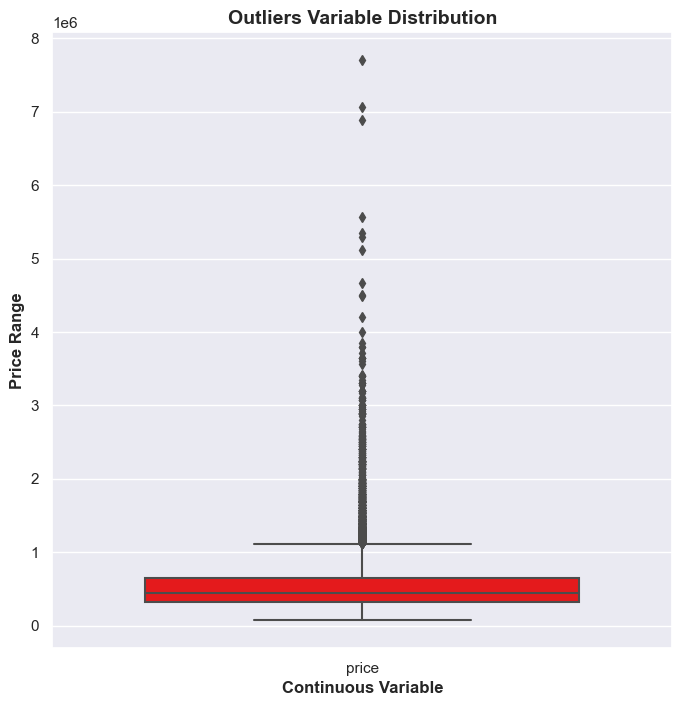

In [12]:
# Outlier Analysis of target variable with maximum amount of Inconsistency

outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df.shape

In [13]:
df.duplicated().sum()

3

In [14]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
12736,8648900110,555000,3.0000,2.5000,1940.0000,3211.0000,2.0000,0.0000,0.0000,3.0000,8.0000,1940.0000,0.0000,2009.0000,0,98027,47.5644,-122.0930,1880.0000,3078.0000,0.0000,5151.0000
19714,6308000010,585000,3.0000,2.5000,2290.0000,5089.0000,2.0000,0.0000,0.0000,3.0000,9.0000,2290.0000,0.0000,2001.0000,0,98006,47.5443,-122.1720,2290.0000,7984.0000,1.0000,7379.0000
20111,1825069031,550000,4.0000,1.7500,2410.0000,8447.0000,2.0000,0.0000,3.0000,4.0000,8.0000,2060.0000,350.0000,1936.0000,1980,98074,47.6499,-122.0880,2520.0000,14789.0000,0.0000,10857.0000


In [15]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Step 3: Visualising the Data

Here we will identify if some predictors directly have a strong association

with the outcome variable price

Text(0, 0.5, 'Count of houses')

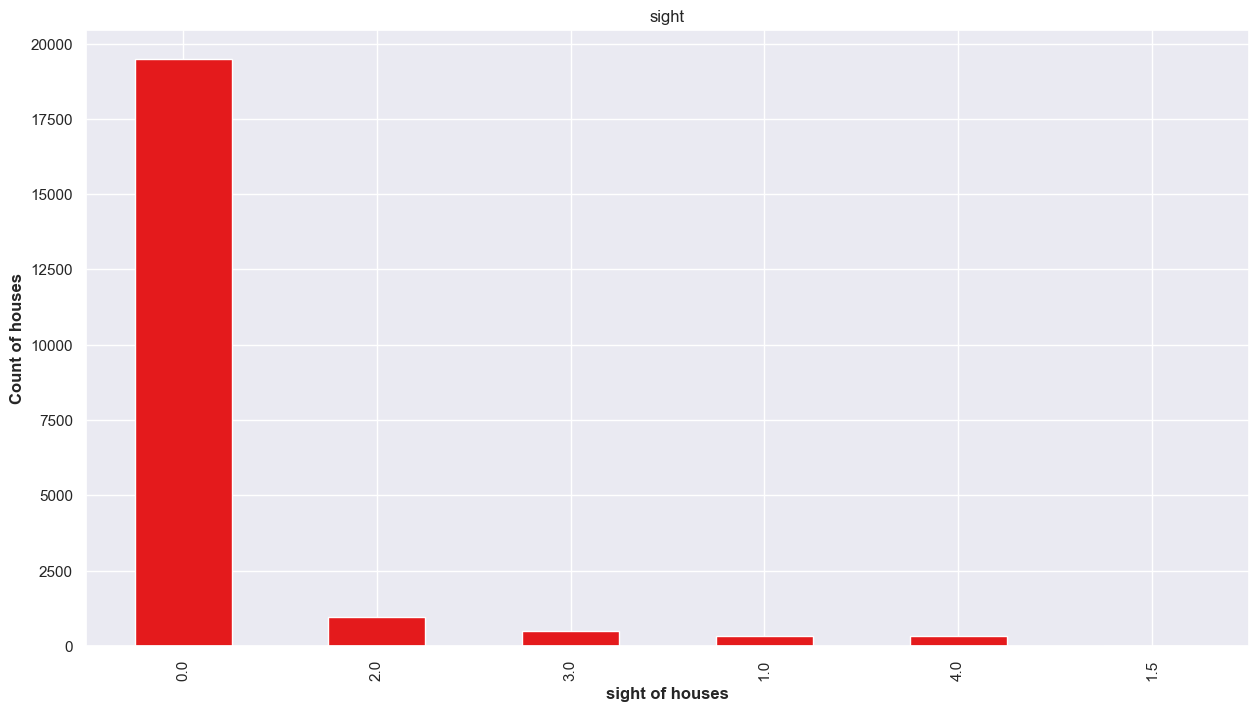

In [16]:
plt.rcParams['figure.figsize'] = [15,8]
ax=df['sight'].value_counts().plot(kind='bar',stacked=True, colormap ='Set1')
ax.title.set_text('sight')
plt.xlabel("sight of houses",fontweight ='bold')
plt.ylabel("Count of houses",fontweight ='bold')

<Axes: xlabel='price', ylabel='Density'>

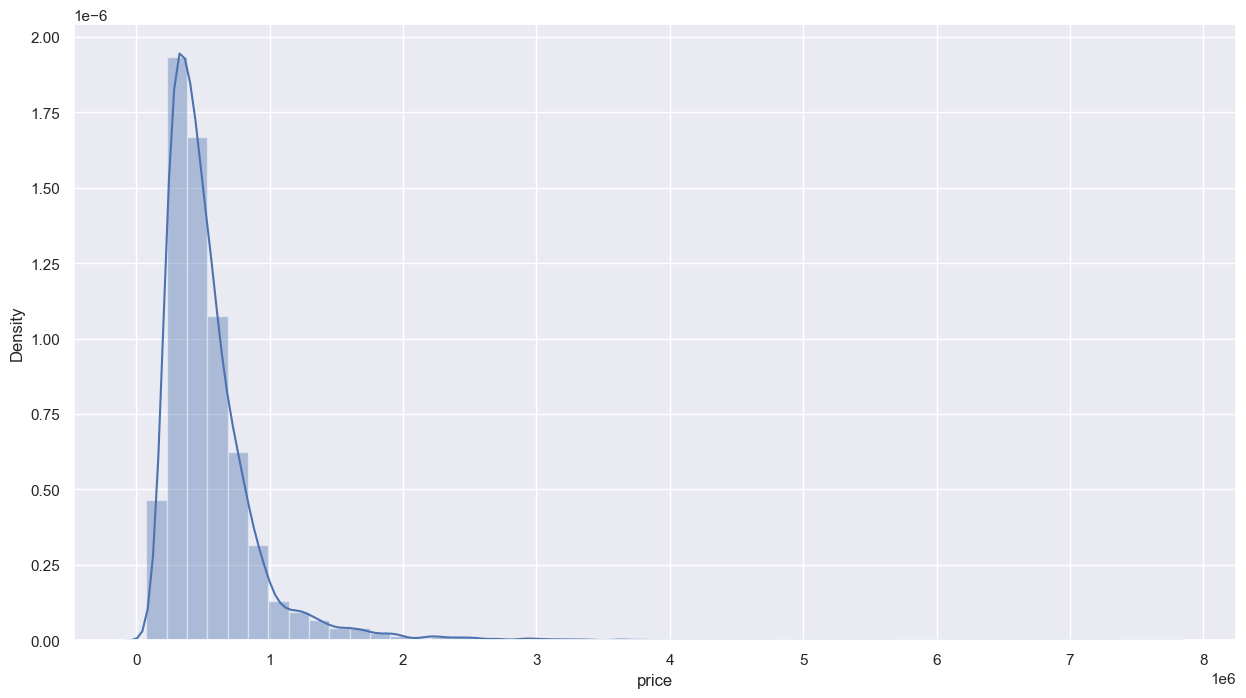

In [17]:
sns.distplot(df['price'])

<Axes: title={'center': 'House Price Distribution Plot'}, xlabel='price', ylabel='Density'>

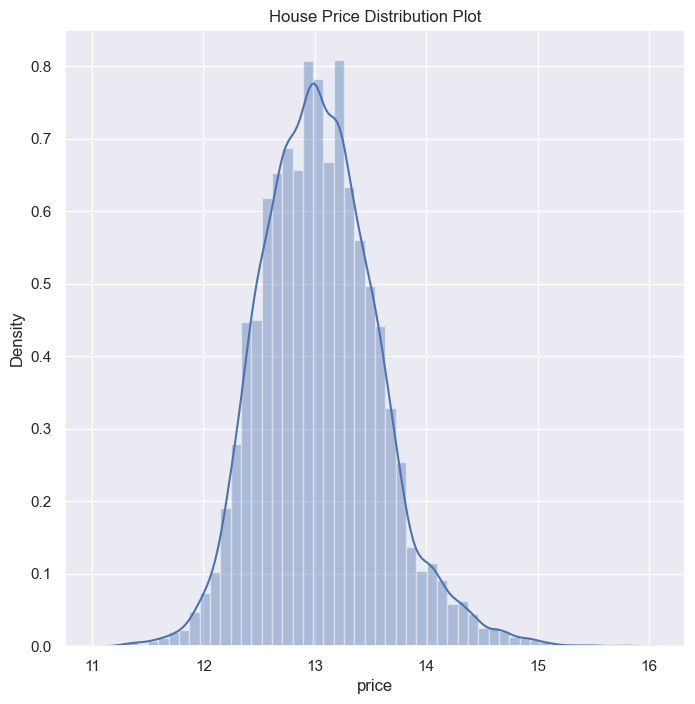

In [18]:
plt.figure(figsize=(8,8))

plt.title('House Price Distribution Plot')
sns.distplot(np.log(df['price']))

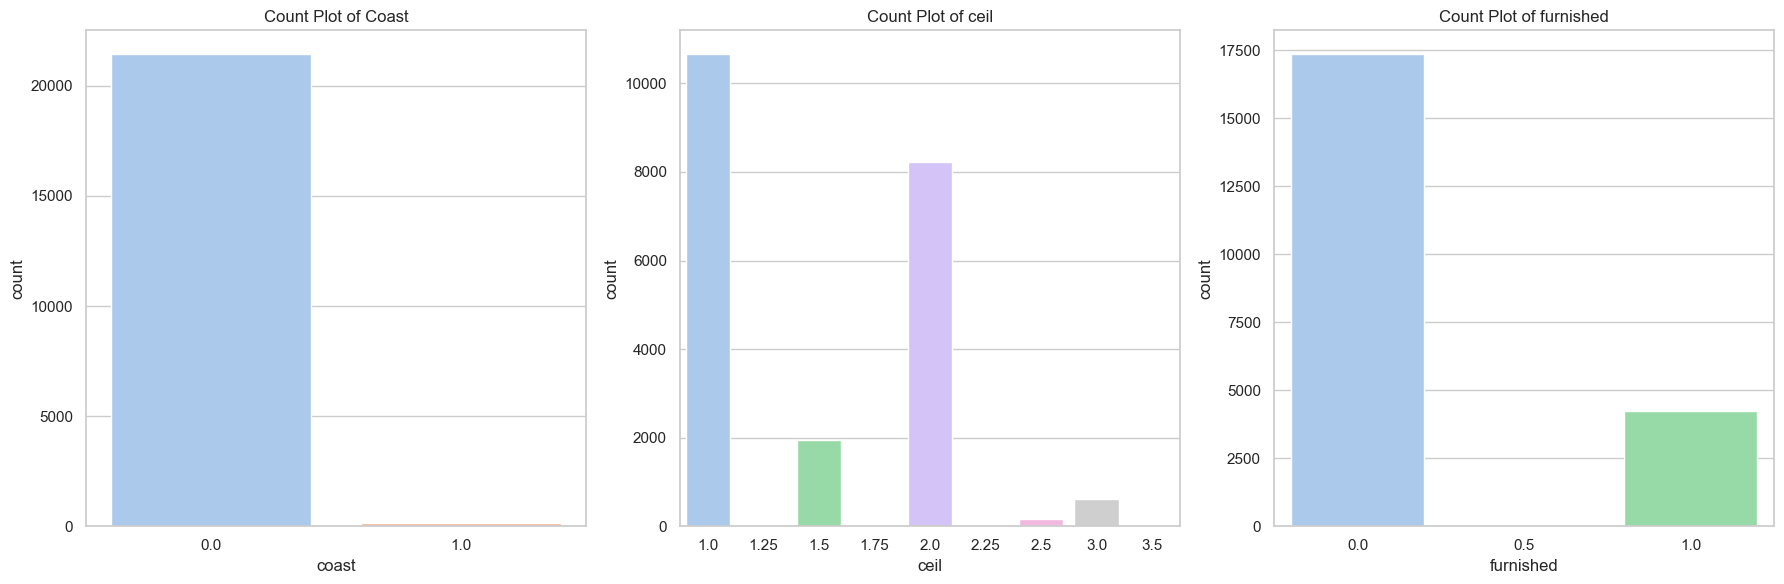

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.countplot(x='coast', data=df, palette='pastel')
plt.title('Count Plot of Coast')

plt.subplot(1,3,2)
sns.countplot(x='ceil', data=df, palette='pastel')
plt.title('Count Plot of ceil')

plt.subplot(1,3,3)
sns.countplot(x='furnished', data=df, palette='pastel')
plt.title('Count Plot of furnished')

plt.tight_layout()
plt.show()

<Axes: >

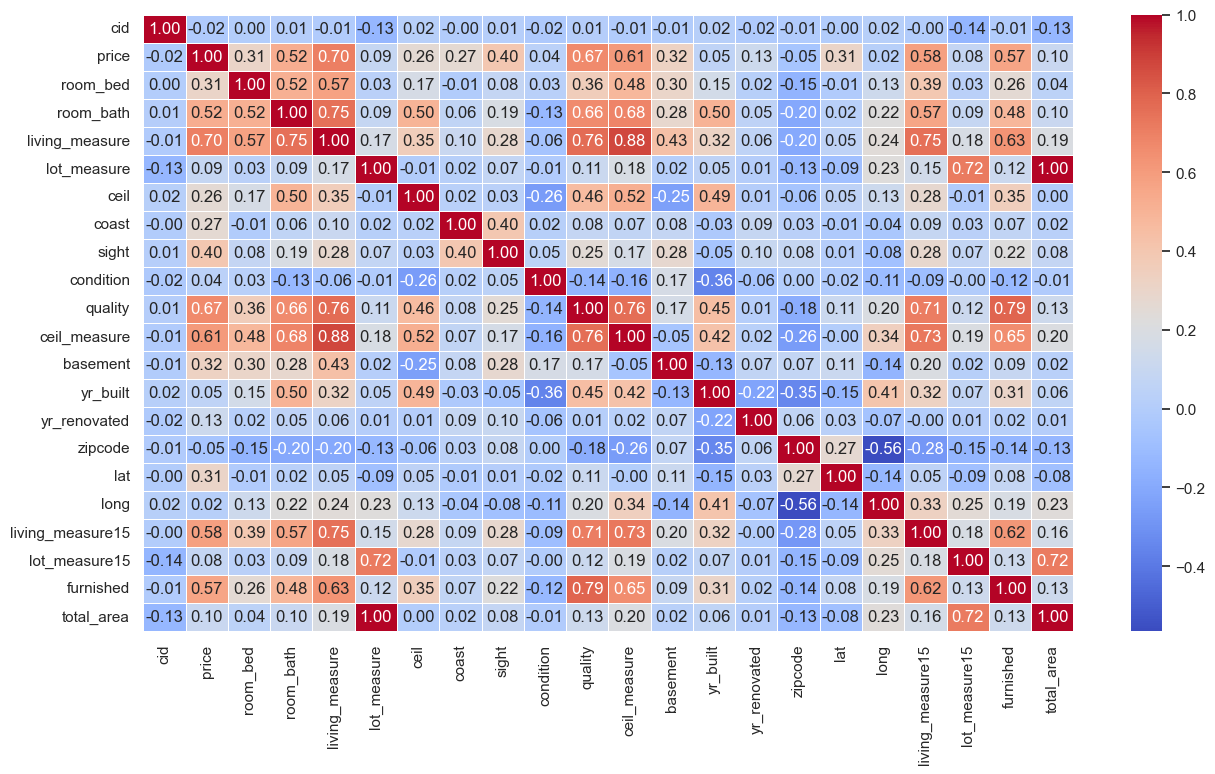

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

In [21]:
threshold =0.5
# Find features with correlation greater than the
threshold
highly_correlated_features =set()
for i in range(len(df.corr().columns)):
  for j in range(i):
    if abs(df.corr().iloc[i, j]) > threshold:
      colname = df.corr().columns[i]
      highly_correlated_features.add(colname)
# Display the highly correlated features
print("Highly Correlated Features")
print(highly_correlated_features)

Highly Correlated Features
{'ceil_measure', 'living_measure', 'yr_built', 'lot_measure15', 'long', 'total_area', 'room_bath', 'quality', 'living_measure15', 'furnished'}


**Visualising few more Categorical Variables**

Boxplot of all the categorical variables

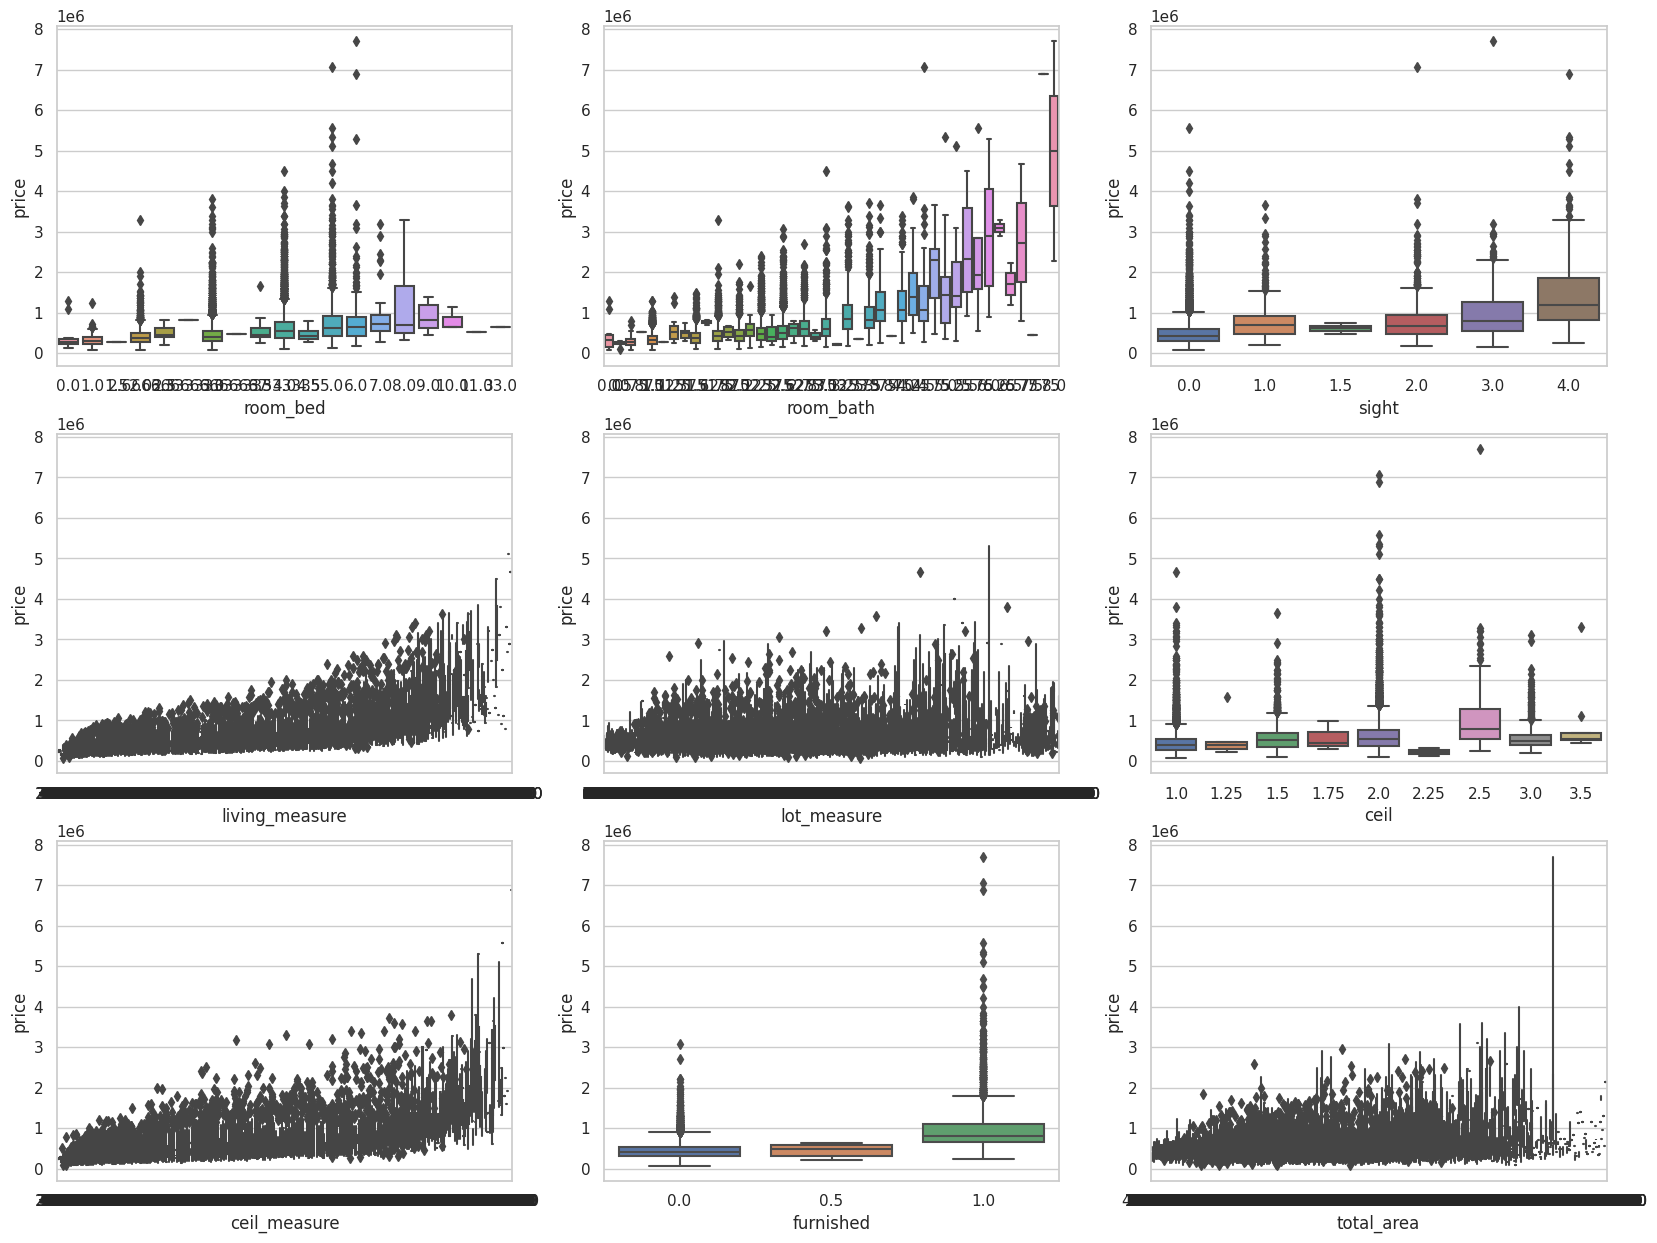

In [37]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'room_bed', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'room_bath', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'sight', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'living_measure', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'lot_measure', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'ceil', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'ceil_measure', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'furnished', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'total_area', y = 'price', data = df)
plt.show()


In [22]:
# Select features and target variable
features = df[['total_area','quality','yr_built','lot_measure15','room_bath','ceil_measure','living_measure15','living_measure', 'total_area']]
target = df['price']
# Reshape the target variable to a 2D array
target = target.values.reshape(-1,1)

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle
import warnings
import math
# Ignore all warnings
warnings.filterwarnings("ignore")

In [24]:
# Create a StandardScaler object
scaler = StandardScaler()
# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(features)

In [25]:
scaled = StandardScaler()
y_scaled = scaled.fit_transform(target)
y_scaled.shape

(21610, 1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Step 6: Building a Linear Model

In [27]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

In [29]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)

In [30]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

In [31]:
svr = SVR()
svr.fit(X_train, y_train)
svr_predictions = svr.predict(X_test)

In [32]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)

**Adding another variable¶**
The R-squared value obtained is 0.65. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the other highly correlated variable, i.e. curbweight.

In [33]:
models = [lr_predictions, dt_predictions, rf_predictions, svr_predictions, gb_predictions]
model_objects = [lr,dt, rf, svr, gb]
model_names = ['Linear Regression','Decision Tree','Random Forest','SVR','Gradient Boosting']
best_model_name = None
best_r2_score = -float('inf')
# Initialize with negative infinity
best_model = None
# Store the best model object
for i in range(len(models)):
  mse = mean_squared_error(y_test, models[i])
  mae = mean_absolute_error(y_test, models[i])
  r2 = r2_score(y_test, models[i])
  print(f"{model_names[i]}:")
  print(f" MSE:{mse:.4f}")
  print(f" MAE:{mae:.4f}")
  print(f" R2 Score:{r2:.2f}")
  if r2 > best_r2_score:
    best_r2_score = r2
    best_model_name = model_names[i]
    best_model_1 = model_objects[i]

  print()

print(f"The best model is:{best_model_1}with R2 Score:{best_r2_score:.2f}")

Linear Regression:
 MSE:0.3749
 MAE:0.3950
 R2 Score:0.62

Decision Tree:
 MSE:0.5074
 MAE:0.4421
 R2 Score:0.49

Random Forest:
 MSE:0.2428
 MAE:0.3127
 R2 Score:0.76

SVR:
 MSE:0.2765
 MAE:0.3225
 R2 Score:0.72

Gradient Boosting:
 MSE:0.2499
 MAE:0.3290
 R2 Score:0.75

The best model is:RandomForestRegressor()with R2 Score:0.76


**REF**

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
X = df.drop('price', axis=1)
# Features
y = df['price']
# Target variable
# Create a linear regression model
model = LinearRegression()

rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_]
print ("Selected Features:", selected_features)

Selected Features: Index(['room_bed', 'room_bath', 'coast', 'sight', 'condition', 'quality',
       'yr_built', 'lat', 'long', 'furnished'],
      dtype='object')


In [35]:
# Select features and target variable
features1 = df[['room_bed','room_bath','coast','sight','condition','quality','yr_built','lat','long','furnished']]
target1 = df['price']
# Reshape the target variable to a 2D array
target1 = target1.values.reshape(-1,1)
# Create a StandardScaler object
scaler1 = StandardScaler()
# Fit the scaler to your data and transform it
X_scaled1 = scaler1.fit_transform(features1)
scaled1 = StandardScaler()
y_scaled1 = scaled1.fit_transform(target1)
# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled1, y_scaled1, test_size=0.2, random_state=42)

In [36]:
X_train1.shape

(17288, 10)

In [37]:
lr1 = LinearRegression()
lr1.fit(X_train1, y_train1)
lr_predictions1 = lr1.predict(X_test1)

In [38]:
rf1 = RandomForestRegressor()
rf1.fit(X_train1, y_train1)
rf_predictions1 = rf1.predict(X_test1)

In [39]:
dt1 = DecisionTreeRegressor()
dt1.fit(X_train1, y_train1)
dt_predictions1 = dt1.predict(X_test1)

In [40]:
svr1 = SVR()
svr1.fit(X_train1, y_train1)
svr_predictions1 = svr1.predict(X_test1)

In [41]:
gb1 = GradientBoostingRegressor()
gb1.fit(X_train1, y_train1)
gb_predictions1 = gb1.predict(X_test1)

In [42]:
models = [lr_predictions1, dt_predictions1, rf_predictions1, svr_predictions1, gb_predictions1]
model_objects = [lr1,dt1, rf1, svr1, gb1]
model_names = ['Linear Regression','Decision Tree','Random Forest','SVR','Gradient Boosting']
best_model_name = None
best_r2_score = -float('inf')
# Initialize with negative infinity
best_model = None
# Store the best model object
for i in range(len(models)):
  mse = mean_squared_error(y_test1, models[i])
  mae = mean_absolute_error(y_test1, models[i])
  r2 = r2_score(y_test1, models[i])
  print(f"{model_names[i]}:")
  print(f" MSE:{mse:.4f}")
  print(f" MAE:{mae:.4f}")
  print(f" R2 Score:{r2:.2f}")
  # Check if the current model has a higher R2 score than the best model
  if r2 > best_r2_score:
    best_r2_score = r2
    best_model_name = model_names[i]
    best_model_2 = model_objects[i]
  print()
# Print the best model and its R2 score
print(f"The best model is: {best_model_2}with R2 Score:{best_r2_score:.2f}")

Linear Regression:
 MSE:0.3289
 MAE:0.3563
 R2 Score:0.67

Decision Tree:
 MSE:0.2775
 MAE:0.2872
 R2 Score:0.72

Random Forest:
 MSE:0.1498
 MAE:0.2140
 R2 Score:0.85

SVR:
 MSE:0.2306
 MAE:0.2561
 R2 Score:0.77

Gradient Boosting:
 MSE:0.1781
 MAE:0.2489
 R2 Score:0.82

The best model is: RandomForestRegressor()with R2 Score:0.85


In [43]:
r2_scores = [r2_score(y_test1, predictions) for predictions in models]
sorted_models, sorted_r2_scores = zip(*sorted(zip(model_names, r2_scores), key=lambda x: x[1], reverse=True))

In [44]:
pred=best_model_2.predict(X_train1)
mse=mean_squared_error(y_train1,pred)
mse

0.022071663394670586

In [45]:
mae=mean_absolute_error(y_train1,pred)
mae

0.08139278510894264

In [46]:
r2_value=r2_score(y_train1,pred)

In [47]:
r2_value

0.9779640044111837

In [48]:
# Input values for prediction
input_values = np.array([[4.0,1.75,0.0,0.0,3.0,8.0,1966.0,47.7228,-122.183,0.0]])
# Standardize the input values using the same scaler used for training
input_values_scaled = scaler1.transform(input_values)
# Make predictions on the scaled input values
prediction_scaled = best_model_2.predict(input_values_scaled)
# Inverse scale the prediction
prediction = scaled1.inverse_transform(prediction_scaled.reshape(-1, 1))
# Display the prediction
print(f"Predicted Price: {prediction[0, 0]}")

Predicted Price: 552270.0


Conclusions:
Feature Importance: Features like the number of bedrooms, living area size, and quality are among the most important factors affecting house prices. Stakeholders should consider these factors when assessing property values.

Model Reliability: The linear regression model provides a baseline for predicting house prices. However, more complex models and additional feature engineering may further improve prediction accuracy.

Outlier Consideration: Outliers, such as very high-priced properties, may affect the model's generalization. Stakeholders should be aware of these outliers when using the model for pricing properties.

Data Quality: Data preprocessing, including handling missing values and converting data types, is crucial for model training. Stakeholders should ensure data quality to maintain model accuracy.